# ML Zoomcamp 6.2 - Data Cleaning and Preparation

In [345]:
import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [346]:
# Load and prepare data
data = pd.read_csv('CreditScoring.csv')
df = pd.DataFrame(data)
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [347]:
# Map numerical values to categorical labels for 'status', 'home', 'marital', 'records', and 'job'
status_values = {
    1: 'ok', 
    2: 'default', 
    0: 'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [348]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [349]:
df.describe().round()


,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [350]:
# Remove rows with 'unk' status and reset index
df = df[df.status != 'unk'].reset_index(drop=True)


In [351]:
# Replace placeholder values with NaN
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [352]:
# Split data into training, validation, and test sets
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [353]:
# Reset index for train, validation, and test sets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [354]:
# Prepare target variables for training, validation, and test sets
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values
# Remove 'status' column from feature sets
del df_train['status']
del df_val['status']
del df_test['status']


# ML Zoomcamp 6.3 - Decision Trees

In [355]:
# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [356]:
# Convert training data to dictionary format and vectorize
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [357]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [358]:
# Fit the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [359]:
# Evaluate model performance on validation set
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [360]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6613396381778112

In [361]:
# 1.0 means our model is overfitting

In [362]:
# Adjust model to prevent overfitting by setting max_depth
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [363]:
# Evaluate model performance on training and validation sets
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val: ', auc)

train:  0.7054989859726213
val:  0.6685264343319367


In [364]:
# Display the decision tree structure
print(export_text(dt, feature_names=dv.get_feature_names_out()))


|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



# ML Zoomcamp 6.4 - Decision Tree Learning Algorithm

In [365]:
# Example data for decision tree learning algorithm
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [366]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [367]:
# Evaluate splits based on thresholds
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [368]:
from IPython.display import display

In [369]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    print()


0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [370]:
# Example with multiple features
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [371]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [372]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [373]:

for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


# ML Zoomcamp 6.5 - Decision Trees Parameter Tuning

In [374]:
# Iterate over different max_depth values to find the best depth for the decision tree
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (d, auc))


   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.762
  10 -> 0.682
  15 -> 0.658
  20 -> 0.665
None -> 0.659


In [375]:
scores = []

# Iterate over combinations of max_depth and min_samples_leaf to find the best parameters
for d in [4, 5, 6, 7, 10, 15, 20]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.head()


,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [376]:
df_scores.sort_values(by='auc', ascending=False).head()


,max_depth,min_samples_leaf,auc
40,10,15,0.789981
49,15,15,0.788002
58,20,15,0.787275
22,6,15,0.785695
41,10,20,0.785156


In [377]:
# Pivot the DataFrame to create a heatmap-friendly format
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values='auc')
df_scores_pivot.round(3)


max_depth,4,5,6,7,10,15,20
min_samples_leaf,,,,,,,
1,0.761,0.766,0.747,0.748,0.678,0.649,0.649
2,0.761,0.766,0.754,0.763,0.708,0.701,0.689
5,0.761,0.768,0.762,0.757,0.724,0.709,0.719
10,0.761,0.762,0.778,0.763,0.767,0.765,0.759
15,0.764,0.772,0.786,0.780,0.790,0.788,0.787
20,0.761,0.774,0.774,0.779,0.785,0.782,0.782
100,0.756,0.763,0.776,0.780,0.780,0.779,0.780
200,0.747,0.759,0.768,0.768,0.768,0.768,0.768
500,0.680,0.680,0.680,0.680,0.680,0.680,0.680


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

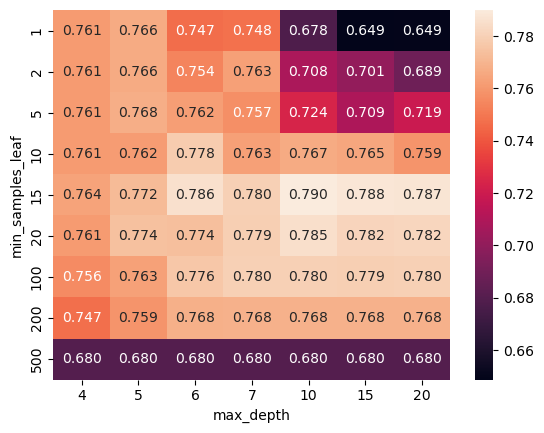

In [378]:
# Visualize the AUC scores using a heatmap
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [379]:
# Train the final Decision Tree model with the best parameters found
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# ML Zoomcamp 6.6 - Ensemble Learning and Random Forest

In [380]:
from sklearn.ensemble import RandomForestClassifier

In [381]:
# Initialize and train a Random Forest model
# A Random Forest is an ensemble of decision trees, typically trained with the "bagging" method.
# The idea is to combine multiple decision trees to improve the model's accuracy and robustness.
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [382]:
# Evaluate the Random Forest model on the validation set
# Random Forests use the predictions of multiple decision trees to make a final prediction.
# This approach helps to reduce overfitting, which is a common issue with individual decision trees.
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)


0.7744726453706618

In [383]:
# Experiment with different numbers of trees to find the optimal number
# More trees can lead to better performance, but also increase computation time.
scores = []

# Iterate over different numbers of trees to find the best number
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

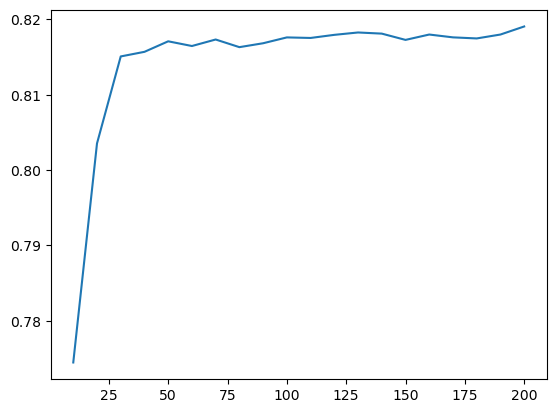

In [384]:
# Plot the AUC scores against the number of trees
# This helps visualize how the number of trees affects model performance.
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)


In [385]:
# Further tuning: Experiment with different max_depth and n_estimators
# max_depth controls the depth of each tree in the forest.
# n_estimators is the number of trees in the forest.
scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_scores.head()


,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


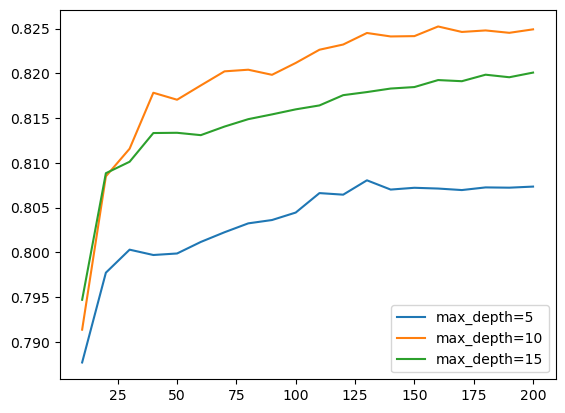

In [386]:
# Plot AUC scores for different max_depth values
# This helps determine the best depth for the trees in the forest.
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
plt.legend()


In [387]:
max_depth = 10

In [388]:
# Further tuning: Experiment with min_samples_leaf and n_estimators
# min_samples_leaf is the minimum number of samples required to be at a leaf node.
scores = []
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [389]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


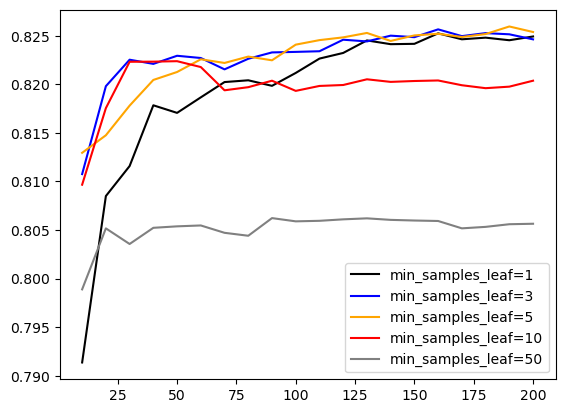

In [390]:
# Plot AUC scores for different min_samples_leaf values
# This helps determine the best minimum samples per leaf for the trees in the forest.
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leafs_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leafs_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, 
             color=col,
             label='min_samples_leaf=%d' % s)
plt.legend()

In [391]:
min_samples_leaf = 3


In [392]:
# Train the final Random Forest model with the best parameters found
# The final model is trained with the optimal number of trees, depth, and minimum samples per leaf.
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

# Evaluate the final model on the validation set
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8233361991717324

# ML Zoomcamp 6.7 - Gradient Boosting and XGBoost

In [393]:
import xgboost as xgb

In [394]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [395]:
xgb_params = {
    'eta': 0.3,  # Learning rate: step size shrinkage used to prevent overfitting. Lower values make the model more robust to overfitting.
    'max_depth': 6,  # Maximum depth of a tree: controls the complexity of the model. Higher values can lead to overfitting.
    'min_child_weight': 1,  # Minimum sum of instance weight (hessian) needed in a child: used to control overfitting. Higher values prevent more partitioning.
    
    'objective': 'binary:logistic',  # Objective function: specifies the learning task and the corresponding learning objective. Here, it's binary classification.
    'nthread': 8,  # Number of parallel threads used to run XGBoost: helps in speeding up the training process.
    
    'seed': 1,  # Random seed: ensures reproducibility of results.
    'verbosity': 1,  # Verbosity of printing messages: 0 (silent), 1 (warning), 2 (info), 3 (debug). Controls the amount of information printed during training.
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [396]:
y_pred = model.predict(dval)

In [397]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [398]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [399]:
%%capture output

xgb_params = {
    'eta': 0.3,  
    'max_depth': 6,  
    'min_child_weight': 1, 
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8, 
    
    'seed': 1,  
    'verbosity': 1, 
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [400]:
s = output.stdout

In [401]:
print(s)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [402]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)    

    return df_results

In [403]:
df_scores = parse_xgb_output(output)

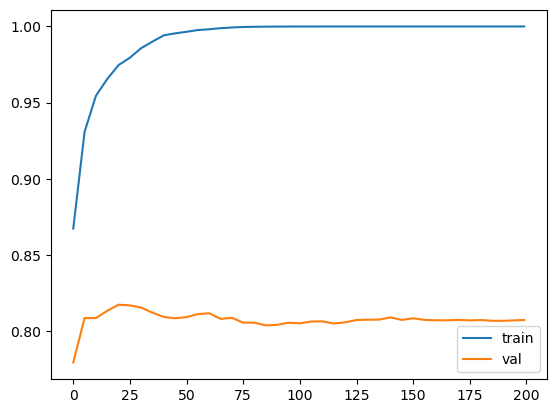

In [404]:
plt.plot(df_scores.num_iter, df_scores.train_auc, label='train')
plt.plot(df_scores.num_iter, df_scores.val_auc, label='val')
plt.legend()

In [405]:
# The plot shows the AUC scores for training and validation datasets over boosting rounds.
# The training AUC (blue) approaches 1.0, indicating a perfect fit to the training data.
# The validation AUC (orange) plateaus, showing that the model is not improving on unseen data.
# This gap suggests overfitting, where the model captures noise in the training data but fails to generalize.

# ML Zoomcamp 6.8 - XGBoost Parameter Tuning


In [406]:
scores = {}

In [419]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [420]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [421]:
scores.keys()

dict_keys(['eta=0.01', 'eta=1', 'eta=0.05', 'eta=0.1'])

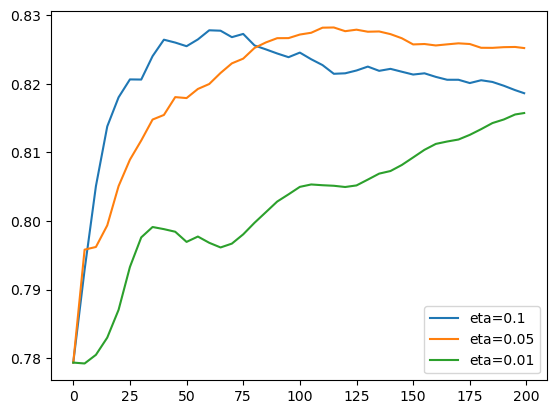

In [422]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']

for eta in etas: 
    df_scores = scores[eta]
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=eta)
plt.legend()

# Checking different eta values (learning rates) is crucial because it affects the convergence speed and stability of the model.
# A high eta might lead to faster convergence but can cause overshooting and instability.
# A low eta ensures more stable and gradual learning, potentially leading to better generalization.
# By comparing different eta values, we can find a balance between convergence speed and model performance.

# The peak indicates the convergence of the learning rate

1. Learning Rate eta=1.0 (Blue Line):
- The AUC score starts high but fluctuates significantly, indicating instability.
- This high learning rate causes the model to make large updates, leading to potential overshooting and poor convergence.
- The model struggles to stabilize, which can result in suboptimal performance.
2. Learning Rate eta=0.3 (Orange Line):
- The AUC score initially increases rapidly but then starts to decline and fluctuate.
- This moderate learning rate allows for faster learning but may still be too aggressive, causing the model to overfit early on.
- The performance stabilizes but does not improve significantly over time.
3. Learning Rate eta=0.1 (Green Line):
- The AUC score increases steadily and reaches the highest peak among the three learning rates.
- This lower learning rate allows for more gradual and stable learning, leading to better generalization.
- The model maintains a higher AUC score over more boosting rounds, indicating better performance and stability.

In [423]:
# Normally he tunes ETA first, then MAX_DEPTH, last is MIN_CHILD_WEIGHT

In [428]:
scores = {}

In [437]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [438]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [439]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10'])

In [440]:
del scores['max_depth=10']

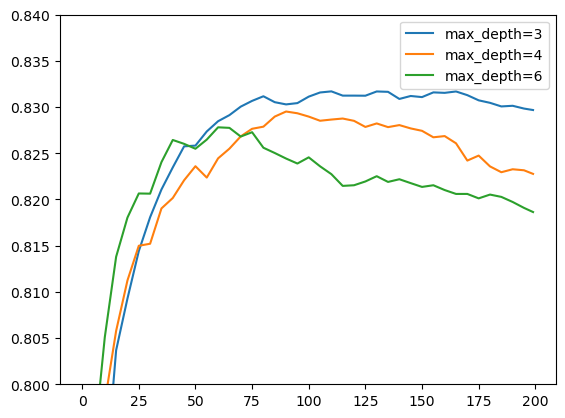

In [441]:
for max_depth, df_scores in scores.items(): 
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

# Tuning the max_depth parameter is crucial for controlling the complexity of the model:
# - Prevents overfitting by limiting the tree's depth, ensuring it doesn't capture noise.
# - Balances model complexity to avoid underfitting, capturing essential patterns without overfitting.
# - Optimizes computational efficiency by reducing the resources needed for deeper trees.
# - Enhances interpretability, as shallower trees are easier to understand and visualize.
# Overall, it helps achieve a good trade-off between bias and variance, improving generalization to new data.

In [442]:
# The chart shows the AUC scores for different max_depth values over boosting rounds in an XGBoost model.
# - The orange line (max_depth=3) achieves the highest AUC score, indicating the best performance.
# - The green line (max_depth=4) starts strong but plateaus, showing slightly lower performance.
# - The blue line (max_depth=6) initially improves but then declines, suggesting overfitting.
# This illustrates the importance of tuning max_depth to balance model complexity and generalization.

In [443]:
scores = {}

In [448]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [449]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [450]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

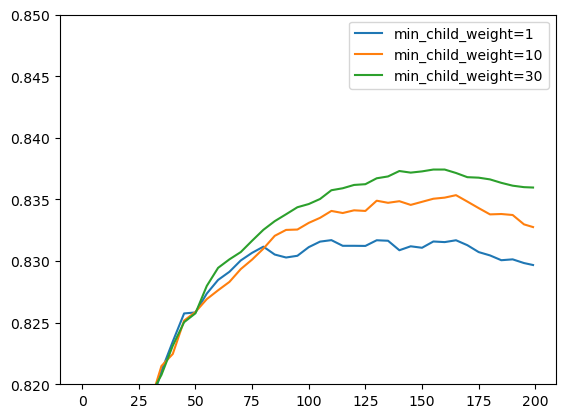

In [451]:
for min_child_weight, df_scores in scores.items(): 
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.85)
plt.legend()

# min_child_weight is a parameter in XGBoost that specifies the minimum sum of instance weight (hessian) needed in a child.
# It is used to control overfitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
# Tuning min_child_weight helps in balancing the model's complexity and its ability to generalize to unseen data.

In [452]:
# The plot shows the AUC scores for different min_child_weight values over boosting rounds.
# - A higher min_child_weight (green line, 30) results in better performance, indicating less overfitting and better generalization.
# - The green line achieves the highest AUC score, suggesting that a min_child_weight of 30 is optimal for this model.
# - Lower values (blue and orange lines) show lower AUC scores, indicating potential overfitting.

In [453]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=155)

In [454]:
# We finally finished our XGradientBoost model
# It is useful to know that eta, max_Depth, adn min_child_weight are important in tuning XGB
# There are also other useful parameters like subsample and colsample_bytree and lambda and alpha

# ML Zoomcamp 6.9 - Selecting the Best Model

In [455]:
# Train a Decision Tree model with the best parameters found
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [456]:
# Train a Random Forest model with the best parameters found
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [457]:
# Train an XGBoost model with the best parameters found
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=155)

In [458]:
# Evaluate the Decision Tree model on the validation set
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7850954203095104

In [459]:
# Evaluate the Random Forest model on the validation set
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [460]:
# Evaluate the XGBoost model on the validation set
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8372435881911312

In [461]:
# Prepare the full training data for the final model
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.status == 'default').astype(int).values

del df_full_train['status']

In [471]:
# Convert full training data to dictionary format and vectorize
dicts_full_train = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

# Convert test data to dictionary format and vectorize
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [465]:
# Prepare DMatrix for XGBoost with full training data
features = dv.get_feature_names_out().tolist()
dfulltrain= xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)

dtest= xgb.DMatrix(X_test, feature_names=features)

In [466]:
# Train the final XGBoost model on the full training data
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=155)

In [470]:
# Evaluate the final XGBoost model on the test set
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8317469820634378